In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting up random seed for project requirements 
np.random.seed(73)

In [43]:
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [1]:
test = 'test'

In [44]:
df.head()

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,total_senate_years,total_house_years,total_years,total_raised,total_from_small_donors,percent_from_small_donors*,total_money_raised,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,35.520000,44.500000,0.253,39.090000,0.101,46.740002,0.316,46.910000,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.739990,0.292,3340.969971,0.393
1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,48.730000,69.239998,0.421,64.839996,0.331,63.360001,0.300,61.130001,0.254,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.760010,0.260,3319.469971,0.356
2,2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,151.009995,175.300003,0.161,191.500000,0.268,189.479996,0.255,208.389999,0.380,2584.590088,2912.429932,0.127,3055.729980,0.182,3130.010010,0.211,3298.459961,0.276
3,3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,78.989998,48.860001,-0.381,55.400002,-0.299,70.970001,-0.102,80.239998,0.016,3337.750000,2237.399902,-0.330,2799.310059,-0.161,2991.770020,-0.104,3389.780029,0.016
4,4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,19.690001,19.840000,0.008,23.600000,0.199,25.980000,0.319,32.160000,0.633,2529.189941,2799.550049,0.107,2863.699951,0.132,3115.340088,0.232,3340.969971,0.321


In [45]:
# I want to look through all of these columns for cleaning/dropping
pd.set_option('display.max_columns', 999)

In [46]:
df.head()

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,total_senate_years,total_house_years,total_years,total_raised,total_from_small_donors,percent_from_small_donors*,total_money_raised,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,35.520000,44.500000,0.253,39.090000,0.101,46.740002,0.316,46.910000,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.739990,0.292,3340.969971,0.393
1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,48.730000,69.239998,0.421,64.839996,0.331,63.360001,0.300,61.130001,0.254,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.760010,0.260,3319.469971,0.356
2,2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,151.009995,175.300003,0.161,191.500000,0.268,189.479996,0.255,208.389999,0.380,2584.590088,2912.429932,0.127,3055.729980,0.182,3130.010010,0.211,3298.459961,0.276
3,3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,78.989998,48.860001,-0.381,55.400002,-0.299,70.970001,-0.102,80.239998,0.016,3337.750000,2237.399902,-0.330,2799.310059,-0.161,2991.770020,-0.104,3389.780029,0.016
4,4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Nevada,Democratic,0,2,2,$4748019,$284775,6.00%,Raised over $100k,19.690001,19.840000,0.008,23.600000,0.199,25.980000,0.319,32.160000,0.633,2529.189941,2799.550049,0.107,2863.699951,0.132,3115.340088,0.232,3340.969971,0.321


In [48]:
df['representative'].nunique()

138

In [49]:
df.groupby('representative').mean().head(30)

,level_0,timestamp,total_senate_years,total_house_years,total_years,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
representative,,,,,,,,,,,,,,,,,,,,,,,
"A. Mitchell Mcconnell, Jr.",7093.846154,1.548723e+09,0.0,6.0,6.0,54.248462,53.864615,-0.019308,52.740001,-0.045692,53.003847,-0.035154,52.493076,-0.027538,2843.919246,2849.068434,0.005231,2882.131535,0.016385,2921.872314,0.029154,3023.818453,0.063923
Adam Kinzinger,4333.304348,1.588723e+09,0.0,10.0,10.0,16.200435,17.680000,0.138304,19.495652,0.259826,19.314348,0.226652,21.445435,0.342304,2866.807373,3008.599535,0.050739,3204.061301,0.120652,3294.524350,0.151783,3494.142578,0.221000
Alan S. Lowenthal,1963.099010,1.591424e+09,0.0,8.0,8.0,87.408111,91.331534,0.134063,96.576354,0.253152,104.137294,0.403208,112.327161,0.597287,3101.925784,3152.706630,0.020495,3260.170761,0.056383,3356.313800,0.088396,3649.772605,0.183083
"Angus S King, Jr.",8447.481481,1.497101e+09,8.0,0.0,8.0,560.706656,517.841912,-0.026407,526.010573,-0.008852,466.104326,-0.002630,532.073877,0.031037,2471.931862,2497.111138,0.010778,2532.716286,0.026296,2568.848533,0.040593,2641.321854,0.066593
Anthony E. Gonzalez,732.500000,1.598933e+09,0.0,2.0,2.0,28.919999,29.090001,0.029000,28.415001,0.007500,35.470000,0.274000,36.640000,0.334500,3526.649902,3380.800049,-0.041000,3269.959961,-0.073000,3666.719971,0.040000,3811.149902,0.081000
Austin Scott,2781.846154,1.603148e+09,0.0,10.0,10.0,11.192308,15.139231,0.780462,25.128462,1.762846,27.025384,2.573077,18.853077,1.404000,3458.336877,3614.132324,0.046077,3697.475417,0.070077,3813.093881,0.103769,4113.648513,0.191000
Benjamin L Cardin,10397.000000,1.416200e+09,14.0,20.0,34.0,51.510640,48.018864,-0.080000,48.087255,-0.070333,49.721349,-0.007000,50.817740,0.017333,2041.319946,2012.890015,-0.014000,2022.550049,-0.009000,2109.659912,0.033000,2122.729980,0.040000
Bill Pascrell,4230.500000,1.572280e+09,0.0,24.0,24.0,70.360000,70.790003,0.071500,69.780003,0.001000,72.325000,-0.157000,78.204996,-0.129000,3045.224976,3130.640015,0.028500,3056.390015,0.006000,2840.264893,-0.058500,3173.400024,0.048500
Billy Long,4204.500000,1.584331e+09,0.0,10.0,10.0,47.619999,55.889999,0.174000,54.750000,0.150000,56.040001,0.177000,51.759998,0.087000,2386.129883,2783.360107,0.166000,2852.500000,0.195000,3113.489990,0.305000,3340.969971,0.400000


**Conclusion**: I wasn't sure where total_years came from. It is clearly the sum of total senate and house years

#### Create dataframe with just total_years. Will likely examine house and senate years separately too.

In [50]:
df_just_total_yr = df.drop(columns=['total_senate_years', 'total_house_years'])

In [51]:
df_just_total_yr.dtypes

level_0                         int64
transaction_date               object
ticker                         object
asset_description              object
type                           object
amount                         object
representative                 object
timestamp                       int64
state                          object
party_x                        object
total_years                     int64
total_raised                   object
total_from_small_donors        object
percent_from_small_donors*     object
total_money_raised             object
start                         float64
day_30                        float64
day_30_stock_perc_diff        float64
day_60                        float64
day_60_stock_perc_diff        float64
day_90                        float64
day_90_stock_perc_diff        float64
day_180                       float64
day_180_stock_perc_diff       float64
sp_start                      float64
sp_30                         float64
sp_30_sp_per

In [52]:
df_just_total_yr.isnull().sum()

level_0                       0
transaction_date              0
ticker                        0
asset_description             0
type                          0
amount                        0
representative                0
timestamp                     0
state                         0
party_x                       0
total_years                   0
total_raised                  0
total_from_small_donors       0
percent_from_small_donors*    0
total_money_raised            0
start                         0
day_30                        0
day_30_stock_perc_diff        0
day_60                        0
day_60_stock_perc_diff        0
day_90                        0
day_90_stock_perc_diff        0
day_180                       0
day_180_stock_perc_diff       0
sp_start                      0
sp_30                         0
sp_30_sp_perc_diff            0
sp_60                         0
sp_60_sp_perc_diff            0
sp_90                         0
sp_90_sp_perc_diff            0
sp_180  

In [53]:
df_just_total_yr.shape

(10081, 33)

In [54]:
df_just_total_yr.dropna(inplace=True)

In [55]:
df_just_total_yr.shape

(10081, 33)

In [56]:
df_just_total_yr['total_raised'] = df_just_total_yr[
    'total_raised'].str.replace('$','').astype(int)

In [57]:
df_just_total_yr['total_from_small_donors'] = df_just_total_yr[
    'total_from_small_donors'].str.replace('$','').astype(int)

In [58]:
df_just_total_yr['percent_from_small_donors'] = df_just_total_yr[
    'percent_from_small_donors*'].str.replace('%','').astype(float)

In [59]:
df_just_total_yr.head()

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,total_years,total_raised,total_from_small_donors,percent_from_small_donors*,total_money_raised,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,percent_from_small_donors
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,2,4748019,284775,6.00%,Raised over $100k,35.520000,44.500000,0.253,39.090000,0.101,46.740002,0.316,46.910000,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.739990,0.292,3340.969971,0.393,6.0
1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Nevada,Democratic,2,4748019,284775,6.00%,Raised over $100k,48.730000,69.239998,0.421,64.839996,0.331,63.360001,0.300,61.130001,0.254,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.760010,0.260,3319.469971,0.356,6.0
2,2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Nevada,Democratic,2,4748019,284775,6.00%,Raised over $100k,151.009995,175.300003,0.161,191.500000,0.268,189.479996,0.255,208.389999,0.380,2584.590088,2912.429932,0.127,3055.729980,0.182,3130.010010,0.211,3298.459961,0.276,6.0
3,3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Nevada,Democratic,2,4748019,284775,6.00%,Raised over $100k,78.989998,48.860001,-0.381,55.400002,-0.299,70.970001,-0.102,80.239998,0.016,3337.750000,2237.399902,-0.330,2799.310059,-0.161,2991.770020,-0.104,3389.780029,0.016,6.0
4,4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Nevada,Democratic,2,4748019,284775,6.00%,Raised over $100k,19.690001,19.840000,0.008,23.600000,0.199,25.980000,0.319,32.160000,0.633,2529.189941,2799.550049,0.107,2863.699951,0.132,3115.340088,0.232,3340.969971,0.321,6.0


In [60]:
df_just_total_yr.drop(columns=['percent_from_small_donors*'], inplace=True)

In [61]:
df_just_total_yr.dtypes

level_0                        int64
transaction_date              object
ticker                        object
asset_description             object
type                          object
amount                        object
representative                object
timestamp                      int64
state                         object
party_x                       object
total_years                    int64
total_raised                   int64
total_from_small_donors        int64
total_money_raised            object
start                        float64
day_30                       float64
day_30_stock_perc_diff       float64
day_60                       float64
day_60_stock_perc_diff       float64
day_90                       float64
day_90_stock_perc_diff       float64
day_180                      float64
day_180_stock_perc_diff      float64
sp_start                     float64
sp_30                        float64
sp_30_sp_perc_diff           float64
sp_60                        float64
s

In [65]:
df_just_total_yr.groupby('party_x').mean()

,level_0,timestamp,total_years,total_raised,total_from_small_donors,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,percent_from_small_donors
party_x,,,,,,,,,,,,,,,,,,,,,,,,
Democratic,4057.610479,1.566190e+09,10.313769,5.477307e+06,7.027640e+05,145.391152,150.522226,0.034898,152.920023,0.068732,158.224916,0.097717,171.033629,0.190371,2918.915929,2966.765515,0.021143,3024.852395,0.042474,3081.200808,0.062088,3321.349069,0.140822,8.170654
Independent,8447.481481,1.497101e+09,8.000000,5.380897e+06,6.592000e+05,560.706656,517.841912,-0.026407,526.010573,-0.008852,466.104326,-0.002630,532.073877,0.031037,2471.931862,2497.111138,0.010778,2532.716286,0.026296,2568.848533,0.040593,2641.321854,0.066593,12.250000
Libertarian,5234.000000,1.584504e+09,10.000000,1.001120e+06,5.450770e+05,88.800003,106.629997,0.201000,116.849998,0.316000,114.349998,0.288000,131.750000,0.484000,2398.100098,2874.560059,0.199000,2953.909912,0.232000,3097.739990,0.292000,3340.969971,0.393000,54.450000
Republican,6315.084260,1.540652e+09,10.656134,4.114607e+07,8.957903e+06,125.697672,127.480805,0.014935,129.248227,0.042489,133.600872,0.066537,137.655245,0.118191,2737.167674,2783.115027,0.019533,2835.944363,0.039527,2897.689930,0.061565,3038.524507,0.108793,12.165816


**Conclusion**: The overall percent from small donors is small. 7% for Democrats, 9% for Republicans

<AxesSubplot:>

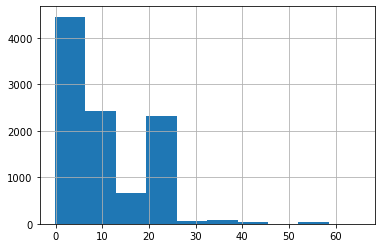

In [66]:
df_just_total_yr['percent_from_small_donors'].hist()

**Conclusion**: Very right-skewed. Some members have an unusually high percentage of small donors, most rely on large donors

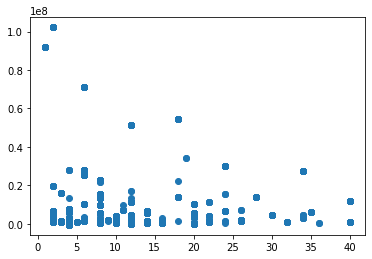

In [67]:
plt.scatter(df_just_total_yr['total_years'], df_just_total_yr['total_raised']);

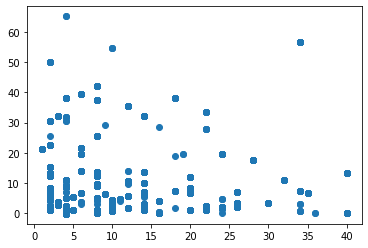

In [68]:
plt.scatter(df_just_total_yr['total_years'], df_just_total_yr['percent_from_small_donors']);

In [69]:
df_just_total_yr.corr()

,level_0,timestamp,total_years,total_raised,total_from_small_donors,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,percent_from_small_donors
level_0,1.000000,-0.819176,0.281040,0.446031,0.424066,0.017877,0.016485,-0.066822,0.014002,-0.094442,0.012843,-0.113803,0.006461,-0.219043,-0.674950,-0.679303,-0.053752,-0.690319,-0.085170,-0.707399,-0.145532,-0.773562,-0.403728,0.346270
timestamp,-0.819176,1.000000,-0.206038,-0.256262,-0.241153,-0.022869,-0.020656,0.080092,-0.017326,0.124993,-0.015958,0.131866,-0.009925,0.218959,0.822744,0.851035,0.091746,0.880599,0.152752,0.885044,0.200055,0.918067,0.440664,-0.251691
total_years,0.281040,-0.206038,1.000000,-0.342307,-0.340299,0.034440,0.037593,0.040411,0.038915,0.013340,0.037870,0.004023,0.038617,-0.026188,-0.141578,-0.112139,0.040455,-0.110114,0.029455,-0.123780,-0.001496,-0.150938,-0.075040,-0.266833
total_raised,0.446031,-0.256262,-0.342307,1.000000,0.993700,-0.008205,-0.010842,-0.089885,-0.012602,-0.062242,-0.011389,-0.065508,-0.015938,-0.123072,-0.269749,-0.309792,-0.085818,-0.290148,-0.046450,-0.281536,-0.045154,-0.320833,-0.165346,0.737612
total_from_small_donors,0.424066,-0.241153,-0.340299,0.993700,1.000000,-0.008541,-0.011000,-0.085572,-0.012858,-0.059354,-0.011496,-0.061272,-0.015676,-0.116628,-0.255598,-0.293494,-0.080897,-0.276324,-0.045896,-0.267702,-0.043824,-0.305558,-0.158832,0.771231
start,0.017877,-0.022869,0.034440,-0.008205,-0.008541,1.000000,0.991727,-0.000433,0.985793,-0.010830,0.993837,-0.004108,0.989168,-0.007741,-0.015582,-0.019576,-0.008836,-0.021064,-0.009902,-0.017980,-0.005831,-0.019122,-0.014041,-0.000062
day_30,0.016485,-0.020656,0.037593,-0.010842,-0.011000,0.991727,1.000000,0.015351,0.996299,0.000709,0.996043,0.003908,0.991395,-0.000750,-0.017081,-0.014911,0.002750,-0.017050,-0.000518,-0.014802,0.001853,-0.017084,-0.008016,-0.002218
day_30_stock_perc_diff,-0.066822,0.080092,0.040411,-0.089885,-0.085572,-0.000433,0.015351,1.000000,0.016885,0.799016,0.015652,0.689093,0.015600,0.535437,-0.110915,0.199961,0.595319,0.170787,0.471896,0.133538,0.392761,0.097522,0.358618,-0.074699
day_60,0.014002,-0.017326,0.038915,-0.012602,-0.012858,0.985793,0.996299,0.016885,1.000000,0.010791,0.994397,0.010838,0.986871,0.005043,-0.015722,-0.014353,0.001608,-0.011386,0.006460,-0.009676,0.007760,-0.012545,-0.002181,-0.002751
day_60_stock_perc_diff,-0.094442,0.124993,0.013340,-0.062242,-0.059354,-0.010830,0.000709,0.799016,0.010791,1.000000,0.008731,0.841382,0.007949,0.661312,-0.082806,0.126765,0.411971,0.242053,0.541313,0.205465,0.459733,0.162890,0.425905,-0.054181


In [70]:
df_tot_yr_corr = df_just_total_yr[['total_years', 'total_raised', 'percent_from_small_donors']]

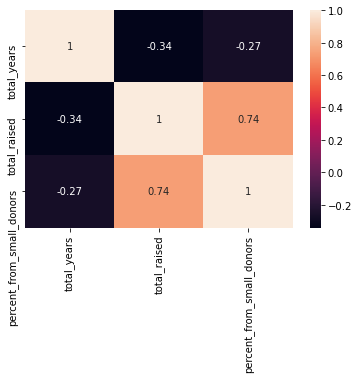

In [71]:
sns.heatmap(df_tot_yr_corr.corr(), annot=True);

In [72]:
df_just_total_yr.head()

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,total_years,total_raised,total_from_small_donors,total_money_raised,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,percent_from_small_donors
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,2,4748019,284775,Raised over $100k,35.520000,44.500000,0.253,39.090000,0.101,46.740002,0.316,46.910000,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.739990,0.292,3340.969971,0.393,6.0
1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Nevada,Democratic,2,4748019,284775,Raised over $100k,48.730000,69.239998,0.421,64.839996,0.331,63.360001,0.300,61.130001,0.254,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.760010,0.260,3319.469971,0.356,6.0
2,2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Nevada,Democratic,2,4748019,284775,Raised over $100k,151.009995,175.300003,0.161,191.500000,0.268,189.479996,0.255,208.389999,0.380,2584.590088,2912.429932,0.127,3055.729980,0.182,3130.010010,0.211,3298.459961,0.276,6.0
3,3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Nevada,Democratic,2,4748019,284775,Raised over $100k,78.989998,48.860001,-0.381,55.400002,-0.299,70.970001,-0.102,80.239998,0.016,3337.750000,2237.399902,-0.330,2799.310059,-0.161,2991.770020,-0.104,3389.780029,0.016,6.0
4,4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Nevada,Democratic,2,4748019,284775,Raised over $100k,19.690001,19.840000,0.008,23.600000,0.199,25.980000,0.319,32.160000,0.633,2529.189941,2799.550049,0.107,2863.699951,0.132,3115.340088,0.232,3340.969971,0.321,6.0


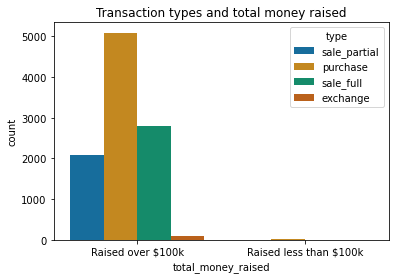

In [73]:
# Seaborn category plot for counts within groups example

sns.countplot(data=df_just_total_yr, x = 'total_money_raised', hue = 'type', palette="colorblind");
plt.title('Transaction types and total money raised');

In [74]:
df_just_total_yr['total_money_raised'].value_counts()

Raised over $100k         10063
Raised less than $100k       18
Name: total_money_raised, dtype: int64

**Conclusion**: Drop this column

In [75]:
amounts_df = df_just_total_yr.groupby('amount').mean()
amounts_df

,level_0,timestamp,total_years,total_raised,total_from_small_donors,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,percent_from_small_donors
amount,,,,,,,,,,,,,,,,,,,,,,,,
"$1,000,001 - $5,000,000",3658.647059,1.585639e+09,15.941176,4.675461e+07,1.391763e+07,270.494556,292.919700,0.016765,274.953087,0.024824,313.255594,0.104941,370.871469,0.244941,3073.553567,3044.945312,-0.008529,3060.181784,-0.000471,3185.075899,0.039706,3476.593491,0.133000,33.497059
"$1,001 -",1857.807453,1.590749e+09,7.925466,8.707505e+05,5.573246e+04,62.017908,67.363345,0.188019,71.499639,0.310317,76.957432,0.491429,82.967450,0.686888,3093.581440,3146.126333,0.020416,3251.566456,0.055298,3325.783294,0.080559,3622.128012,0.176242,4.955217
"$1,001 - $15,000",5192.090342,1.550730e+09,9.574878,2.327446e+07,4.782268e+06,130.742123,134.203661,0.023755,135.090524,0.049957,138.942082,0.074400,146.565856,0.139497,2801.312450,2852.587016,0.022167,2905.055086,0.042021,2961.298005,0.062067,3146.024753,0.123541,10.359339
"$100,001 - $250,000",5317.470032,1.563006e+09,7.378549,3.657541e+07,7.833337e+06,96.098731,96.905643,0.007868,103.573002,0.080098,107.614874,0.096826,116.963929,0.185587,2876.480058,2868.266830,0.002549,2999.337276,0.048937,3070.053418,0.072931,3270.340774,0.138842,11.480032
"$15,001 - $50,000",5498.955056,1.556292e+09,13.162297,2.604539e+07,5.500970e+06,173.601788,175.371229,0.020413,180.567590,0.048018,186.530521,0.068816,197.600024,0.144855,2882.361823,2932.254736,0.020033,2975.710431,0.036279,3037.287217,0.057640,3231.184015,0.120400,9.914750
"$250,001 - $500,000",4423.209677,1.578708e+09,7.274194,3.461869e+07,8.800815e+06,173.975645,188.703587,0.045710,183.658792,0.087581,205.104520,0.130065,241.581531,0.293710,3016.210313,2997.075792,0.000065,3049.495806,0.020855,3147.966811,0.053871,3421.522406,0.141677,18.275000
"$5,000,001 - $25,000,000",4845.142857,1.590429e+09,3.285714,6.643496e+07,1.410567e+07,130.755711,122.804285,-0.047143,125.718571,-0.006286,130.465714,0.023429,140.278573,0.097429,3168.832868,3024.630022,-0.040143,3127.664307,-0.005857,3324.715751,0.054000,3600.352818,0.144286,17.118571
"$50,001 - $100,000",5869.552581,1.551928e+09,17.747610,1.708194e+07,3.312310e+06,138.843953,143.889513,0.007373,151.214521,0.054715,159.505492,0.078893,167.693622,0.169484,2827.652061,2847.862485,0.010356,2919.030062,0.035499,2986.971167,0.059262,3172.906675,0.121115,7.568184
"$500,001 - $1,000,000",4530.300000,1.582393e+09,17.550000,3.478593e+07,1.170534e+07,222.936248,220.768252,0.053350,232.985750,0.100150,250.779003,0.164050,262.332002,0.204950,3055.402026,3136.603491,0.027300,3221.024500,0.053950,3354.047986,0.098250,3479.776013,0.137800,31.530500


In [76]:
amounts_df = amounts_df.drop(columns=['timestamp', 'total_from_small_donors']).reset_index()

In [78]:
amounts_df

,amount,level_0,total_years,total_raised,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,percent_from_small_donors
0,"$1,000,001 - $5,000,000",3658.647059,15.941176,4.675461e+07,270.494556,292.919700,0.016765,274.953087,0.024824,313.255594,0.104941,370.871469,0.244941,3073.553567,3044.945312,-0.008529,3060.181784,-0.000471,3185.075899,0.039706,3476.593491,0.133000,33.497059
1,"$1,001 -",1857.807453,7.925466,8.707505e+05,62.017908,67.363345,0.188019,71.499639,0.310317,76.957432,0.491429,82.967450,0.686888,3093.581440,3146.126333,0.020416,3251.566456,0.055298,3325.783294,0.080559,3622.128012,0.176242,4.955217
2,"$1,001 - $15,000",5192.090342,9.574878,2.327446e+07,130.742123,134.203661,0.023755,135.090524,0.049957,138.942082,0.074400,146.565856,0.139497,2801.312450,2852.587016,0.022167,2905.055086,0.042021,2961.298005,0.062067,3146.024753,0.123541,10.359339
3,"$100,001 - $250,000",5317.470032,7.378549,3.657541e+07,96.098731,96.905643,0.007868,103.573002,0.080098,107.614874,0.096826,116.963929,0.185587,2876.480058,2868.266830,0.002549,2999.337276,0.048937,3070.053418,0.072931,3270.340774,0.138842,11.480032
4,"$15,001 - $50,000",5498.955056,13.162297,2.604539e+07,173.601788,175.371229,0.020413,180.567590,0.048018,186.530521,0.068816,197.600024,0.144855,2882.361823,2932.254736,0.020033,2975.710431,0.036279,3037.287217,0.057640,3231.184015,0.120400,9.914750
5,"$250,001 - $500,000",4423.209677,7.274194,3.461869e+07,173.975645,188.703587,0.045710,183.658792,0.087581,205.104520,0.130065,241.581531,0.293710,3016.210313,2997.075792,0.000065,3049.495806,0.020855,3147.966811,0.053871,3421.522406,0.141677,18.275000
6,"$5,000,001 - $25,000,000",4845.142857,3.285714,6.643496e+07,130.755711,122.804285,-0.047143,125.718571,-0.006286,130.465714,0.023429,140.278573,0.097429,3168.832868,3024.630022,-0.040143,3127.664307,-0.005857,3324.715751,0.054000,3600.352818,0.144286,17.118571
7,"$50,001 - $100,000",5869.552581,17.747610,1.708194e+07,138.843953,143.889513,0.007373,151.214521,0.054715,159.505492,0.078893,167.693622,0.169484,2827.652061,2847.862485,0.010356,2919.030062,0.035499,2986.971167,0.059262,3172.906675,0.121115,7.568184
8,"$500,001 - $1,000,000",4530.300000,17.550000,3.478593e+07,222.936248,220.768252,0.053350,232.985750,0.100150,250.779003,0.164050,262.332002,0.204950,3055.402026,3136.603491,0.027300,3221.024500,0.053950,3354.047986,0.098250,3479.776013,0.137800,31.530500


In [77]:
# Create a new column for an index to sort these from smallest to largest
amounts_df['real_index'] = [,1,2,4,7,3,5,8,0,6]
amounts_df

ValueError: Length of values (11) does not match length of index (9)

In [79]:
# need to set index in seperate line as far as I can tell
amounts_df.set_index('real_index', inplace=True)

KeyError: "None of ['real_index'] are in the columns"

In [80]:
# finalize dataframe
amounts_df = amounts_df.sort_index()
amounts_df

,amount,level_0,total_years,total_raised,start,day_30,day_30_stock_perc_diff,day_60,day_60_stock_perc_diff,day_90,day_90_stock_perc_diff,day_180,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff,percent_from_small_donors
0,"$1,000,001 - $5,000,000",3658.647059,15.941176,4.675461e+07,270.494556,292.919700,0.016765,274.953087,0.024824,313.255594,0.104941,370.871469,0.244941,3073.553567,3044.945312,-0.008529,3060.181784,-0.000471,3185.075899,0.039706,3476.593491,0.133000,33.497059
1,"$1,001 -",1857.807453,7.925466,8.707505e+05,62.017908,67.363345,0.188019,71.499639,0.310317,76.957432,0.491429,82.967450,0.686888,3093.581440,3146.126333,0.020416,3251.566456,0.055298,3325.783294,0.080559,3622.128012,0.176242,4.955217
2,"$1,001 - $15,000",5192.090342,9.574878,2.327446e+07,130.742123,134.203661,0.023755,135.090524,0.049957,138.942082,0.074400,146.565856,0.139497,2801.312450,2852.587016,0.022167,2905.055086,0.042021,2961.298005,0.062067,3146.024753,0.123541,10.359339
3,"$100,001 - $250,000",5317.470032,7.378549,3.657541e+07,96.098731,96.905643,0.007868,103.573002,0.080098,107.614874,0.096826,116.963929,0.185587,2876.480058,2868.266830,0.002549,2999.337276,0.048937,3070.053418,0.072931,3270.340774,0.138842,11.480032
4,"$15,001 - $50,000",5498.955056,13.162297,2.604539e+07,173.601788,175.371229,0.020413,180.567590,0.048018,186.530521,0.068816,197.600024,0.144855,2882.361823,2932.254736,0.020033,2975.710431,0.036279,3037.287217,0.057640,3231.184015,0.120400,9.914750
5,"$250,001 - $500,000",4423.209677,7.274194,3.461869e+07,173.975645,188.703587,0.045710,183.658792,0.087581,205.104520,0.130065,241.581531,0.293710,3016.210313,2997.075792,0.000065,3049.495806,0.020855,3147.966811,0.053871,3421.522406,0.141677,18.275000
6,"$5,000,001 - $25,000,000",4845.142857,3.285714,6.643496e+07,130.755711,122.804285,-0.047143,125.718571,-0.006286,130.465714,0.023429,140.278573,0.097429,3168.832868,3024.630022,-0.040143,3127.664307,-0.005857,3324.715751,0.054000,3600.352818,0.144286,17.118571
7,"$50,001 - $100,000",5869.552581,17.747610,1.708194e+07,138.843953,143.889513,0.007373,151.214521,0.054715,159.505492,0.078893,167.693622,0.169484,2827.652061,2847.862485,0.010356,2919.030062,0.035499,2986.971167,0.059262,3172.906675,0.121115,7.568184
8,"$500,001 - $1,000,000",4530.300000,17.550000,3.478593e+07,222.936248,220.768252,0.053350,232.985750,0.100150,250.779003,0.164050,262.332002,0.204950,3055.402026,3136.603491,0.027300,3221.024500,0.053950,3354.047986,0.098250,3479.776013,0.137800,31.530500


In [39]:
amount_level = list(range(1,12))
amount_level

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [40]:
amounts_df['amount_level'] = amount_level
amounts_df

,amount,total_years,total_raised,percent_from_small_donors,amount_level
real_index,,,,,
0,"$1,001 -",7.924171,8.464766e+05,4.914408,1
1,"$1,001 - $15,000",9.247332,2.298983e+07,10.324825,2
2,"$15,001 - $50,000",12.620980,2.366122e+07,9.804087,3
3,"$50,001 - $100,000",16.279586,1.461506e+07,7.327189,4
4,"$100,001 - $250,000",8.247059,2.930259e+07,9.927647,5
5,"$250,001 - $500,000",7.967742,2.518294e+07,13.950323,6
6,"$500,001 - $1,000,000",17.842105,2.357612e+07,26.301316,7
7,"$1,000,001 - $5,000,000",14.111111,3.715813e+07,27.338889,8
8,"$5,000,001 - $25,000,000",3.285714,6.643496e+07,17.118571,9


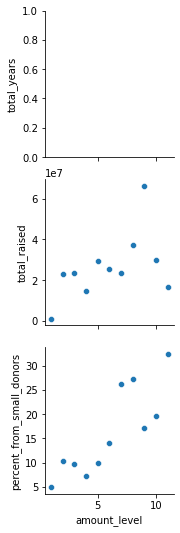

In [41]:
sns.pairplot(amounts_df, y_vars=['total_years', 
                                 'total_raised', 
                                 'percent_from_small_donors'], 
             x_vars=['amount_level']);

<AxesSubplot:xlabel='amount_level', ylabel='total_years'>

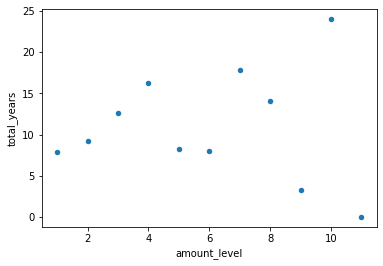

In [42]:
amounts_df.plot.scatter(x='amount_level', y='total_years')